# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics

## Loading the dataset

In [ ]:
# To ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mounting my drive
drive.mount('/content/drive')

# reading csv file from google drive
creditUserData = pd.read_csv("/content/drive/MyDrive/Machine Learning & AI/Data/BankChurners.csv")

# printing first 10 rows
creditUserData.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


## Data Overview

- Observations
- Sanity checks

In [ ]:
creditUserData.shape

(10127, 21)

In [ ]:
creditUserData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Observations: The following columns will need hot encoding: Attrition_flag, Gender, Education_level, Marital_Status, Income_category, and Card_Category.

In [ ]:
# checking for null or missing values
print("\nNumber of null values:\n", creditUserData.isnull().sum())


Number of null values:
 CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


Observations: Education_level and Marital_Status have missing values.

## Sanity Checks

In [ ]:
# checking for duplicates
creditUserData['CLIENTNUM'].duplicated().sum()

0

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Customer_Age'].value_counts()

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Education_Level'].value_counts()

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

Observations: 'abc' is to be treated as a missing value and will be replaced with the median of the column.

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Months_on_book'].value_counts()

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Total_Relationship_Count'].value_counts()

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Months_Inactive_12_mon'].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

In [ ]:
# checking for outliers or missing values with value_counts
creditUserData['Contacts_Count_12_mon'].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [ ]:
# ensuring there are no negative credit limits
(creditUserData['Credit_Limit'] < 0).value_counts()

False    10127
Name: Credit_Limit, dtype: int64

In [ ]:
# ensuring there are no negative revolving balances
(creditUserData['Total_Revolving_Bal'] < 0).value_counts()

False    10127
Name: Total_Revolving_Bal, dtype: int64

In [ ]:
# ensuring there are no negative average open to buy amounts
(creditUserData['Avg_Open_To_Buy'] < 0).value_counts()

False    10127
Name: Avg_Open_To_Buy, dtype: int64

In [ ]:
# ensuring there are no negative amount changes from Q1 to Q4
(creditUserData['Total_Amt_Chng_Q4_Q1'] < 0).value_counts()

False    10127
Name: Total_Amt_Chng_Q4_Q1, dtype: int64

In [ ]:
# ensuring there are no negative transaction amounts
(creditUserData['Total_Trans_Amt'] < 0).value_counts()

False    10127
Name: Total_Trans_Amt, dtype: int64

In [ ]:
# ensuring there are no negative transaction counts
(creditUserData['Total_Trans_Ct'] < 0).value_counts()

False    10127
Name: Total_Trans_Ct, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



**Answers:**


1.   There seems to be a natural seperation in transaction amounts that I assume are directly reflected by the different card categories and credit limits.
2.   Most customers in the database are graduate students with the next most common being either high school graduates or uneducated. The rest of the education levels are minimally distributed.
3.   Most customers make less than 40K and as the income categories rises the number of customers in that category decreases with the exception of their being slightly more people in the range of 80k - 100k than 60k - 80k.
4.   The overall mean of transaction amount is lower with the attritied customers compared to the existing ones.
5.   Customer that are always active each month have the highest amount of attrited customers.
6.   Answered below under the heatmap correlation matrix.

*answers derived from exploratory analysis below*

### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

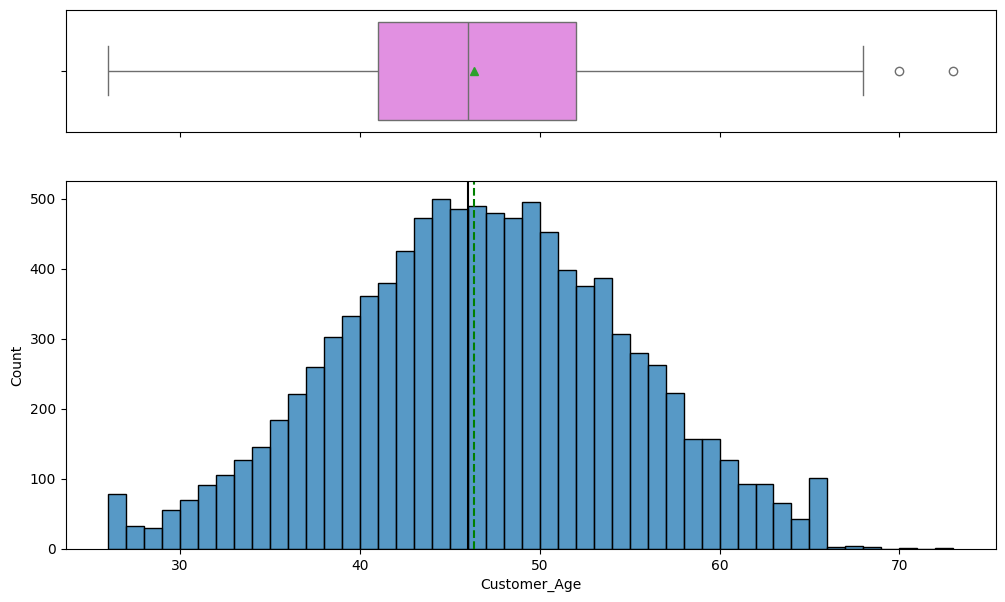

In [ ]:
# showing distribution of Customer_Age
histogram_boxplot(creditUserData, 'Customer_Age')

Observations: Most customers fall within the range of 35 to 55 years of age.

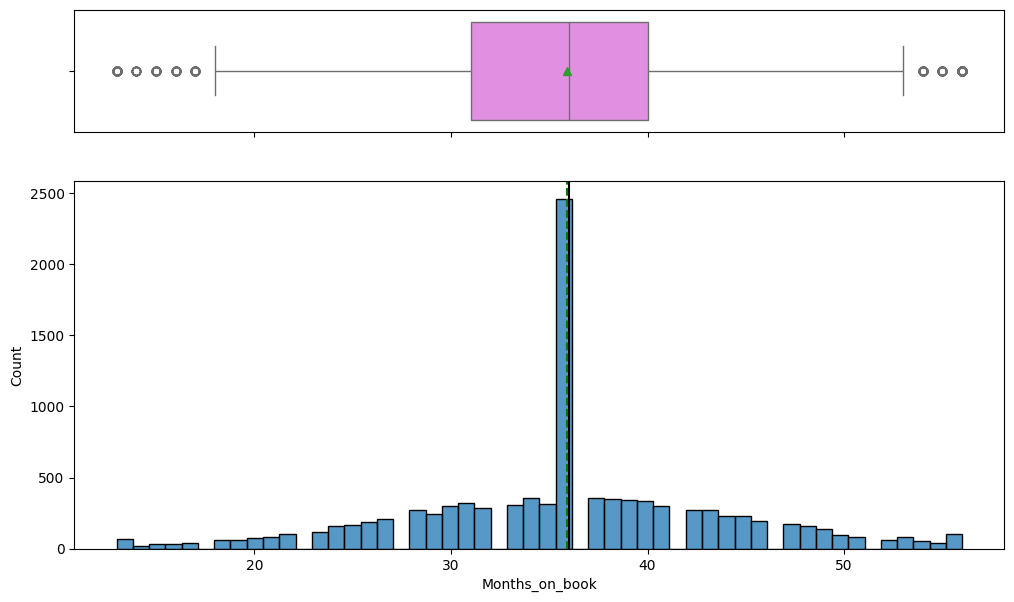

In [ ]:
# showing distribution of Months_on_book
histogram_boxplot(creditUserData, 'Months_on_book')

In [ ]:
# finding the median of the months on books.
creditUserData['Months_on_book'].median()

36.0

Observations: Most customers have been on the books for 36 months.

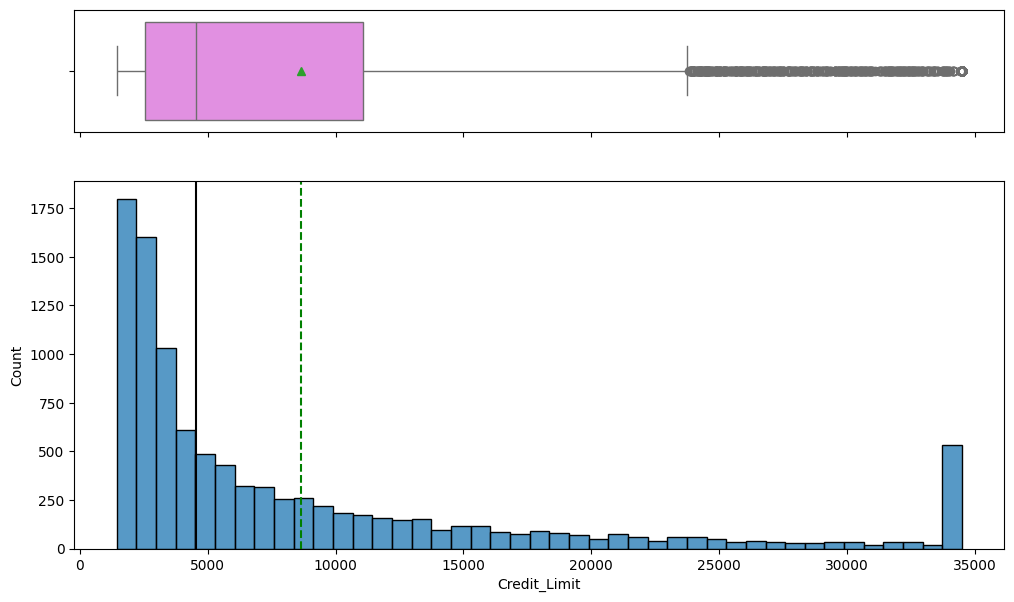

In [ ]:
# showing distribution of Credit_Limit
histogram_boxplot(creditUserData, 'Credit_Limit')

In [ ]:
# finding the minimum credit limit
creditUserData['Credit_Limit'].min()

1438.3

In [ ]:
# finding the maximum credit limit
creditUserData['Credit_Limit'].max()

34516.0

Observations: Majority of card holders have the minimum credit line of 1,483.3 in the skewed graph, although there is a spike of customers having the maximum credit limit of 34,516.

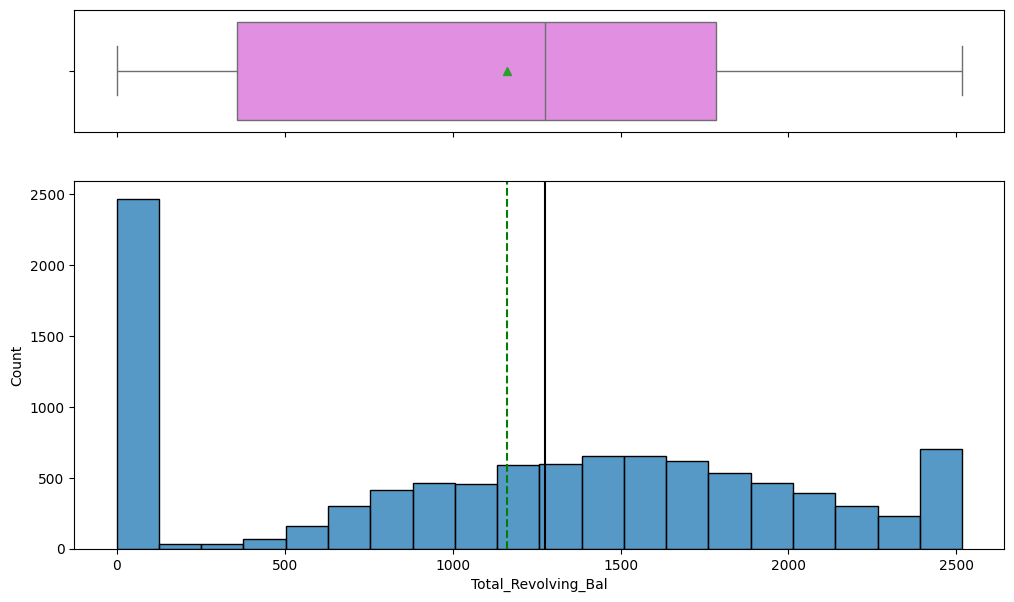

In [ ]:
# showing distribution of Total_Revolving_Bal
histogram_boxplot(creditUserData, 'Total_Revolving_Bal')

Observations: The majority of card holders do not have a revolving balance but there is a normal distribution for others that do have a revolving balance.

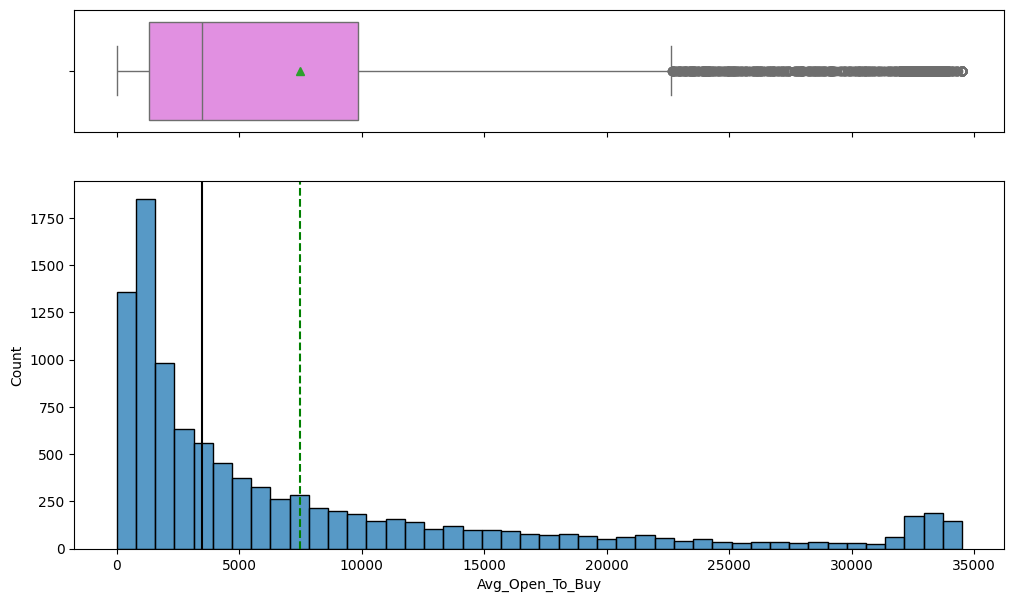

In [ ]:
# showing distribution of Avg_Open_To_Buy
histogram_boxplot(creditUserData, 'Avg_Open_To_Buy')

Observations: There is a large skew with many people using almost or all of their credit line each month.

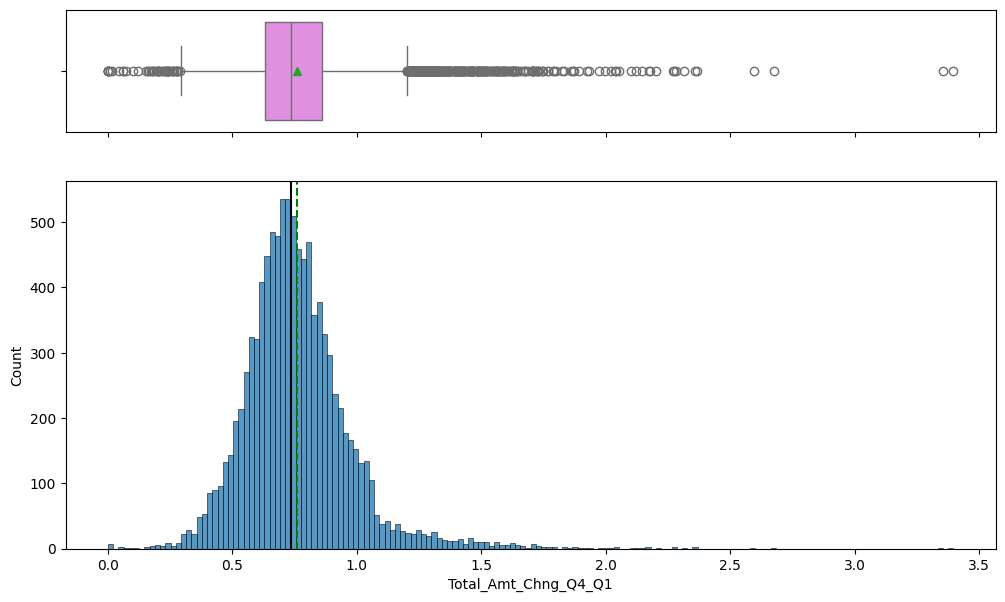

In [ ]:
# showing distribution of Total_Amt_Chng_Q4_Q1
histogram_boxplot(creditUserData, 'Total_Amt_Chng_Q4_Q1')

Observations: Many outliers with there being a dense amount changes around .75.

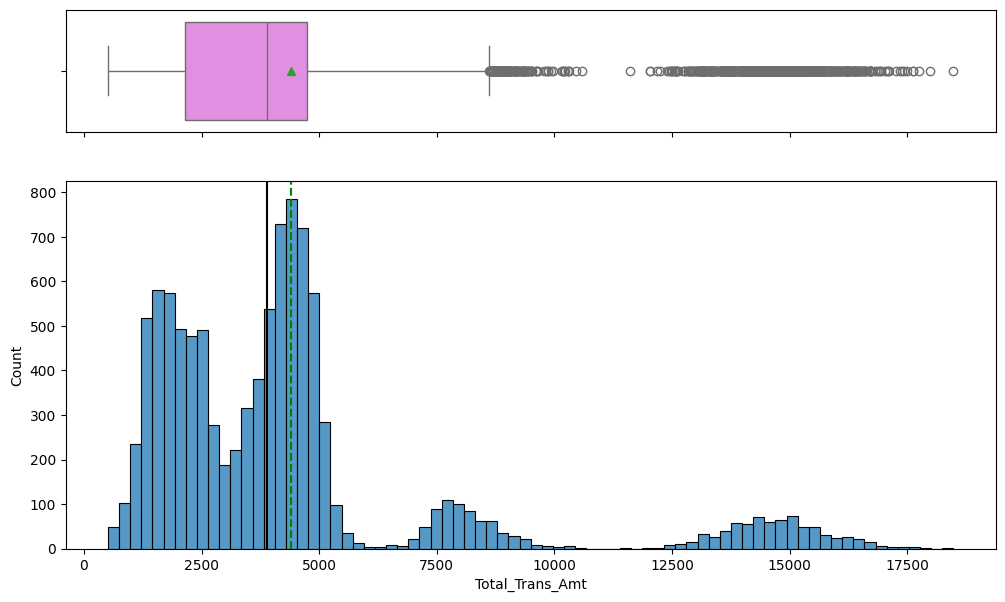

In [ ]:
# showing distribution of Total_Trans_Amt
histogram_boxplot(creditUserData, 'Total_Trans_Amt')

Observations: There are three seperate groups of transaction amounts that are naturally grouping together. These must be reflecting the credit limits for different card category holders.

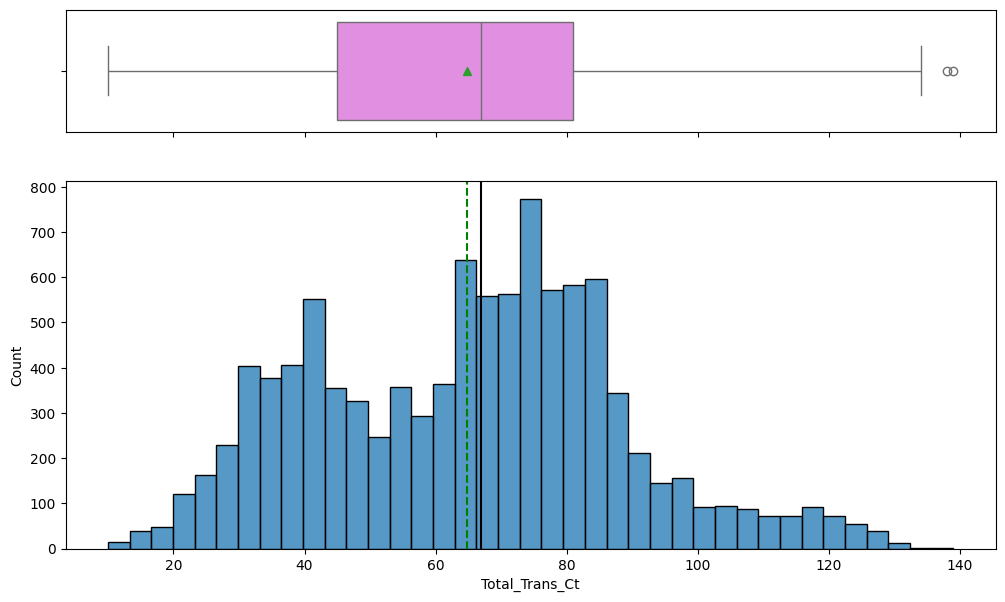

In [ ]:
# showing distribution of Total_Trans_Ct
histogram_boxplot(creditUserData, 'Total_Trans_Ct')

Observations: Normal distribution with the most common range being from 65 to 85.

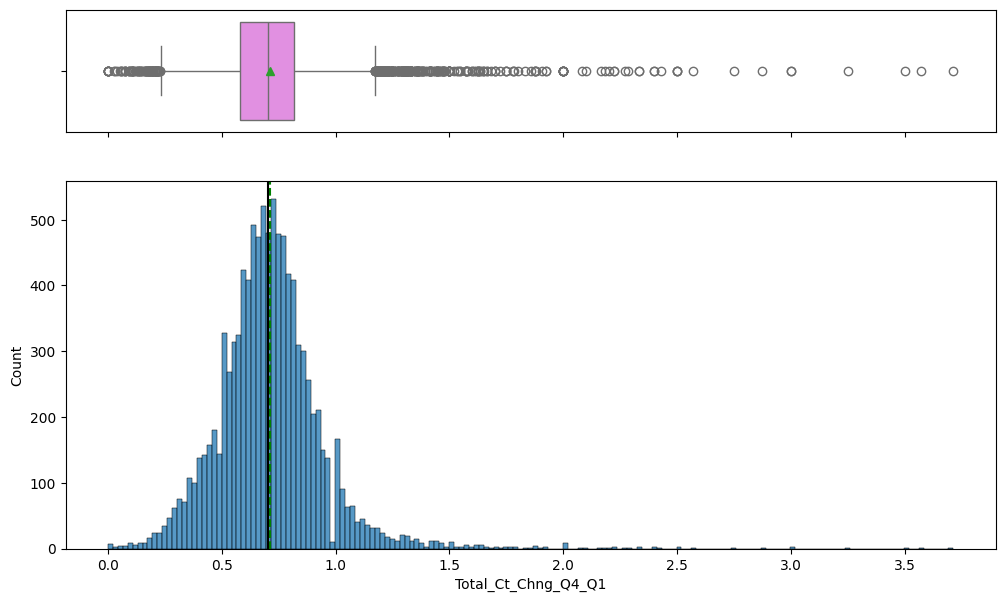

In [ ]:
# showing distribution of Total_Ct_Chng_Q4_Q1
histogram_boxplot(creditUserData, 'Total_Ct_Chng_Q4_Q1')

Observations: There are quite a lot of outliers but also a dense collection of count changes around 0.7.

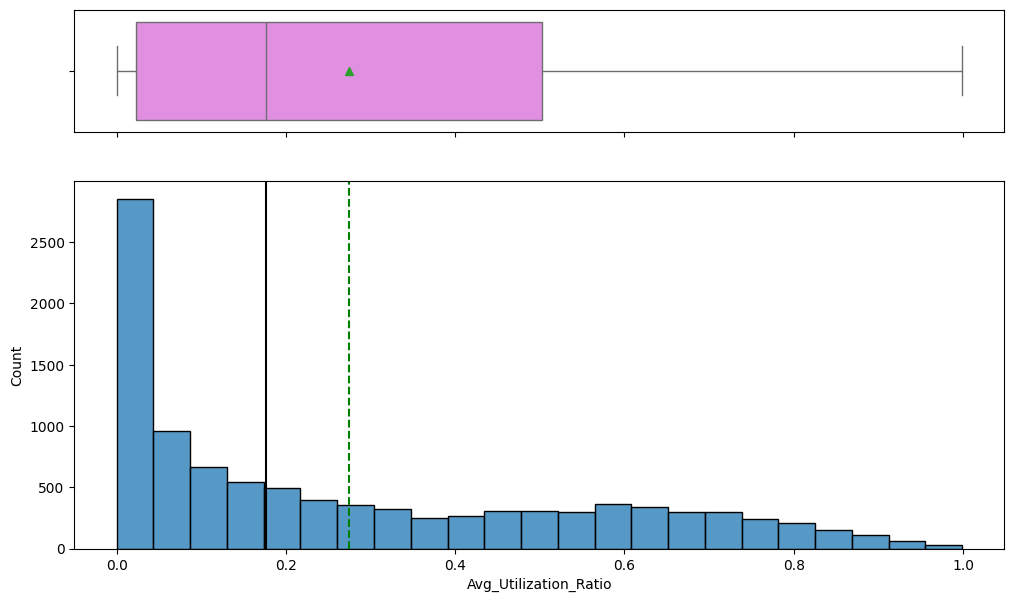

In [ ]:
# showing distribution of Total_Trans_Ct
histogram_boxplot(creditUserData, 'Avg_Utilization_Ratio')

Observations: There is a large skew of people not using their cards at all.

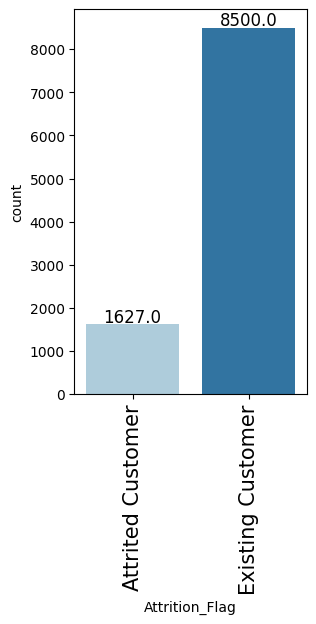

In [ ]:
# showing distribution of Attrition_Flag
labeled_barplot(creditUserData, 'Attrition_Flag')

Observations: Most of the customers are still existing customers and have not closed their accounts.

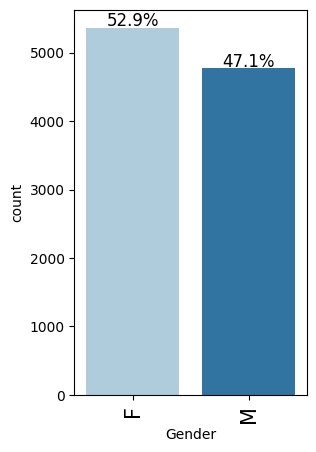

In [ ]:
# showing distribution of Gender
labeled_barplot(creditUserData, 'Gender', perc=True)

Observations: Almost equal split of genders.

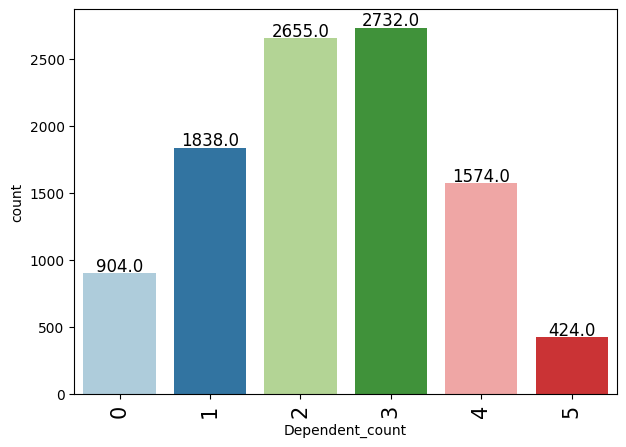

In [ ]:
# showing distribution of Dependent_count
labeled_barplot(creditUserData, 'Dependent_count')

Observations: Most customers have 2 or 3 dependents.

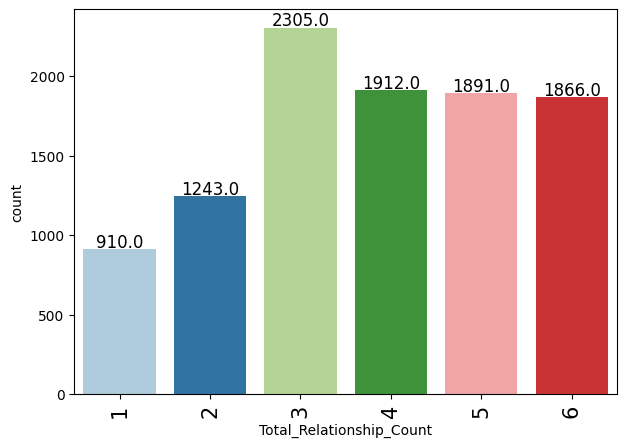

In [ ]:
# showing distribution of Total_Relationship_Count
labeled_barplot(creditUserData, 'Total_Relationship_Count')

Observations: Number of products per customer seems to be normally distributed with most customers using 3 products.

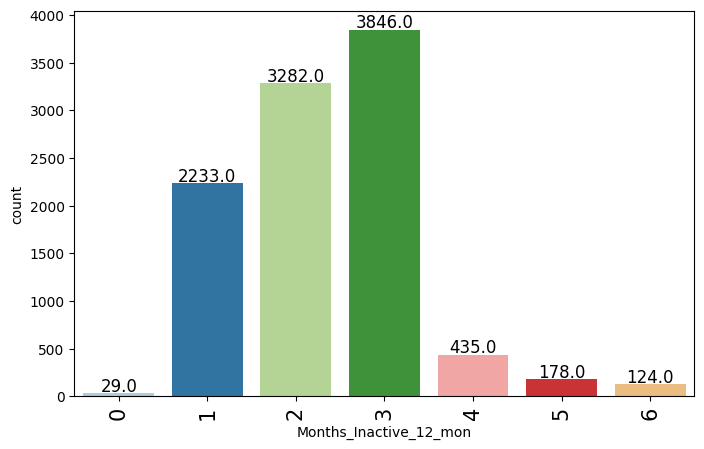

In [ ]:
# showing distribution of Months_Inactive_12_mon
labeled_barplot(creditUserData, 'Months_Inactive_12_mon')

Observations: Most common numbers of inactive months is 2 and 3.

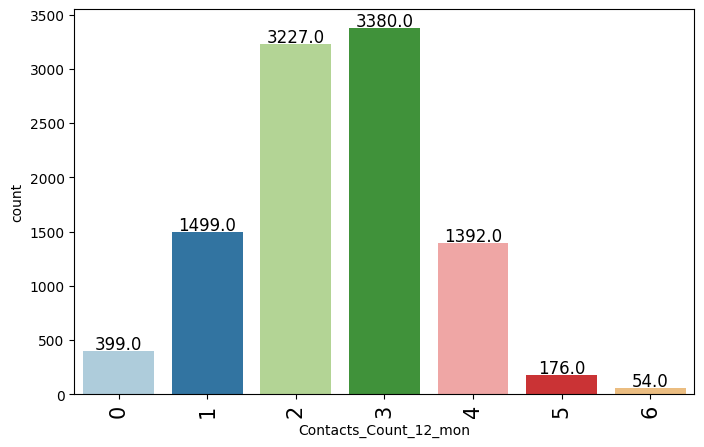

In [ ]:
# showing distribution of Contacts_Count_12_mon
labeled_barplot(creditUserData, 'Contacts_Count_12_mon')

Observations: 2 and 3 contacts per year is the most common with each customer.

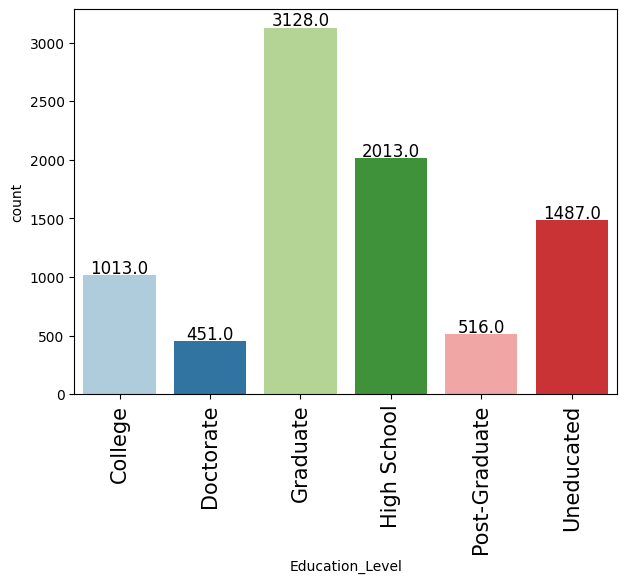

In [ ]:
# showing distribution of Education_Level
labeled_barplot(creditUserData, 'Education_Level')

Observations: Database holds graduates more than any other education level.

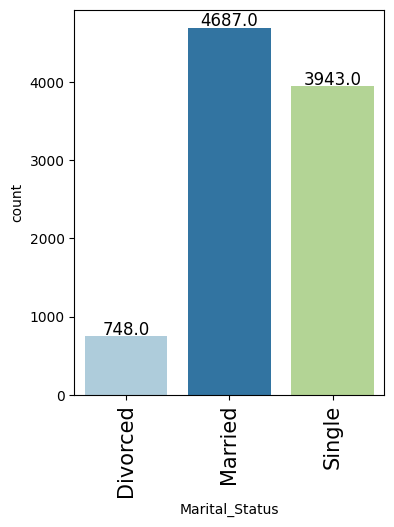

In [ ]:
# showing distribution of Marital_Status
labeled_barplot(creditUserData, 'Marital_Status')

Observations: More than half of the customers are married.

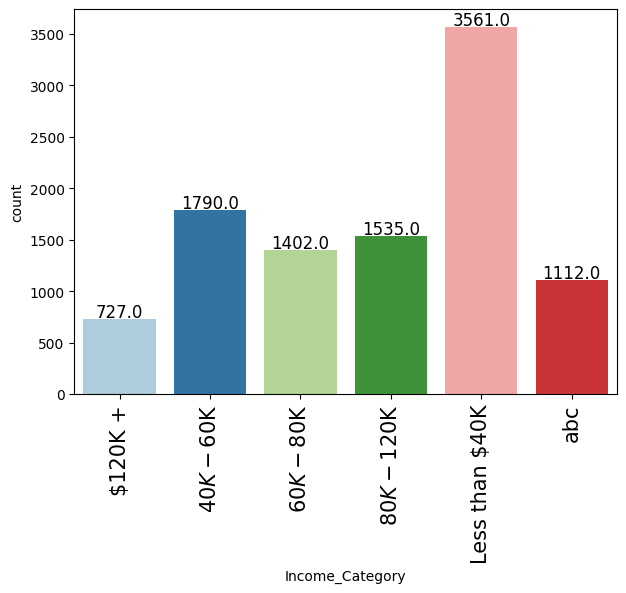

In [ ]:
# showing distribution of Income_Category
labeled_barplot(creditUserData, 'Income_Category')

Observations: Less than 40K has the most in the database.

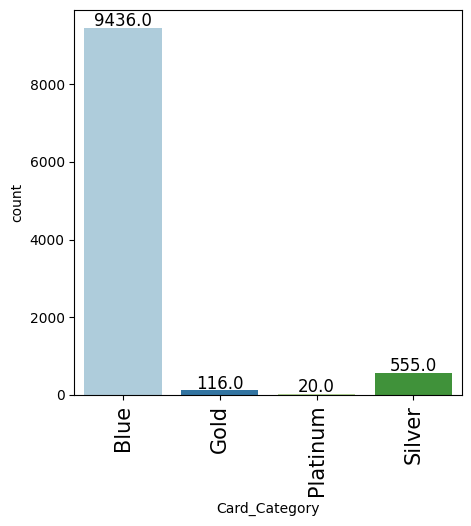

In [ ]:
# showing distribution of Card_Category
labeled_barplot(creditUserData, 'Card_Category')

Observations: Majority of customers have 'Blue' credit cards.

### Missing Value Handling and Encoding

In [ ]:
# dropping client ID column
analysisData = creditUserData.drop('CLIENTNUM', axis=1)

In [ ]:
# Attrition_Flag
# defining dictionary for label mapping
label_mapping = {
    'Existing Customer': 0,
    'Attrited Customer': 1
}

# mapping values
analysisData['Attrition_Flag'] = analysisData['Attrition_Flag'].map(label_mapping)

# converting encoded values to integers
analysisData['Attrition_Flag'] = analysisData['Attrition_Flag'].astype(int)

In [ ]:
# Gender
# defining dictionary for label mapping
label_mapping = {
    'M': 0,
    'F': 1
}

# mapping values
analysisData['Gender'] = analysisData['Gender'].map(label_mapping)

# converting encoded values to integers
analysisData['Gender'] = analysisData['Gender'].astype(int)

In [ ]:
# Education_Level
# replacing missing values with 'unknown' label
analysisData['Education_Level'].fillna('Unknown', inplace=True)

# defining a dictionary to map original labels to encoded numbers
label_mapping = {
    'Unknown': 0,
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6
}

# mapping values
analysisData['Education_Level'] = analysisData['Education_Level'].map(label_mapping)

# converting encoded values to integers
analysisData['Education_Level'] = analysisData['Education_Level'].astype(int)

In [ ]:
# Marital_Status
# replacing missing values with 'Unknown' label
analysisData['Marital_Status'].fillna('Unknown', inplace=True)

# defining dictionary for label mapping
label_mapping = {
    'Unknown': 0,
    'Single': 1,
    'Married': 2,
    'Divorced': 3
}

# mapping values
analysisData['Marital_Status'] = analysisData['Marital_Status'].map(label_mapping)

# converting encoded values to integers
analysisData['Marital_Status'] = analysisData['Marital_Status'].astype(int)


In [ ]:
# Income_Category
# replacing 'adc' missing value income labels with most common income in database
analysisData['Income_Category'] = analysisData['Income_Category'].replace('abc', 'Less than $40K')

# defining dictionary for label mapping
label_mapping = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

# mapping values
analysisData['Income_Category'] = analysisData['Income_Category'].map(label_mapping)

# converting encoded values to integers
analysisData['Income_Category'] = analysisData['Income_Category'].astype(int)


In [ ]:
# Card_Category
# defining dictionary for label mapping
label_mapping = {
    'Blue': 0,
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}

# mapping values
analysisData['Card_Category'] = analysisData['Card_Category'].map(label_mapping)

# converting encoded values to integers
analysisData['Card_Category'] = analysisData['Card_Category'].astype(int)

### Bivariate Analysis

In [ ]:
# pairplot to show distributions of attributes
sns.pairplot(analysisData, corner=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Observations: You can see the relationship of credit_limit, total_revolving_bal, and avg_open_to_buy with the utilization ratio in their curves. You can see the three seperate groups in total_transaction_amount in most of the pairplots. Linear correlations can be found with (total_amnt_change_Q4_Q1 and total_amnt_chng_Q4_Q1), (total_trans_amt and total_trans_ct), (avg_open_to_buy and credit_limit), and (months_on_books and customer_age).

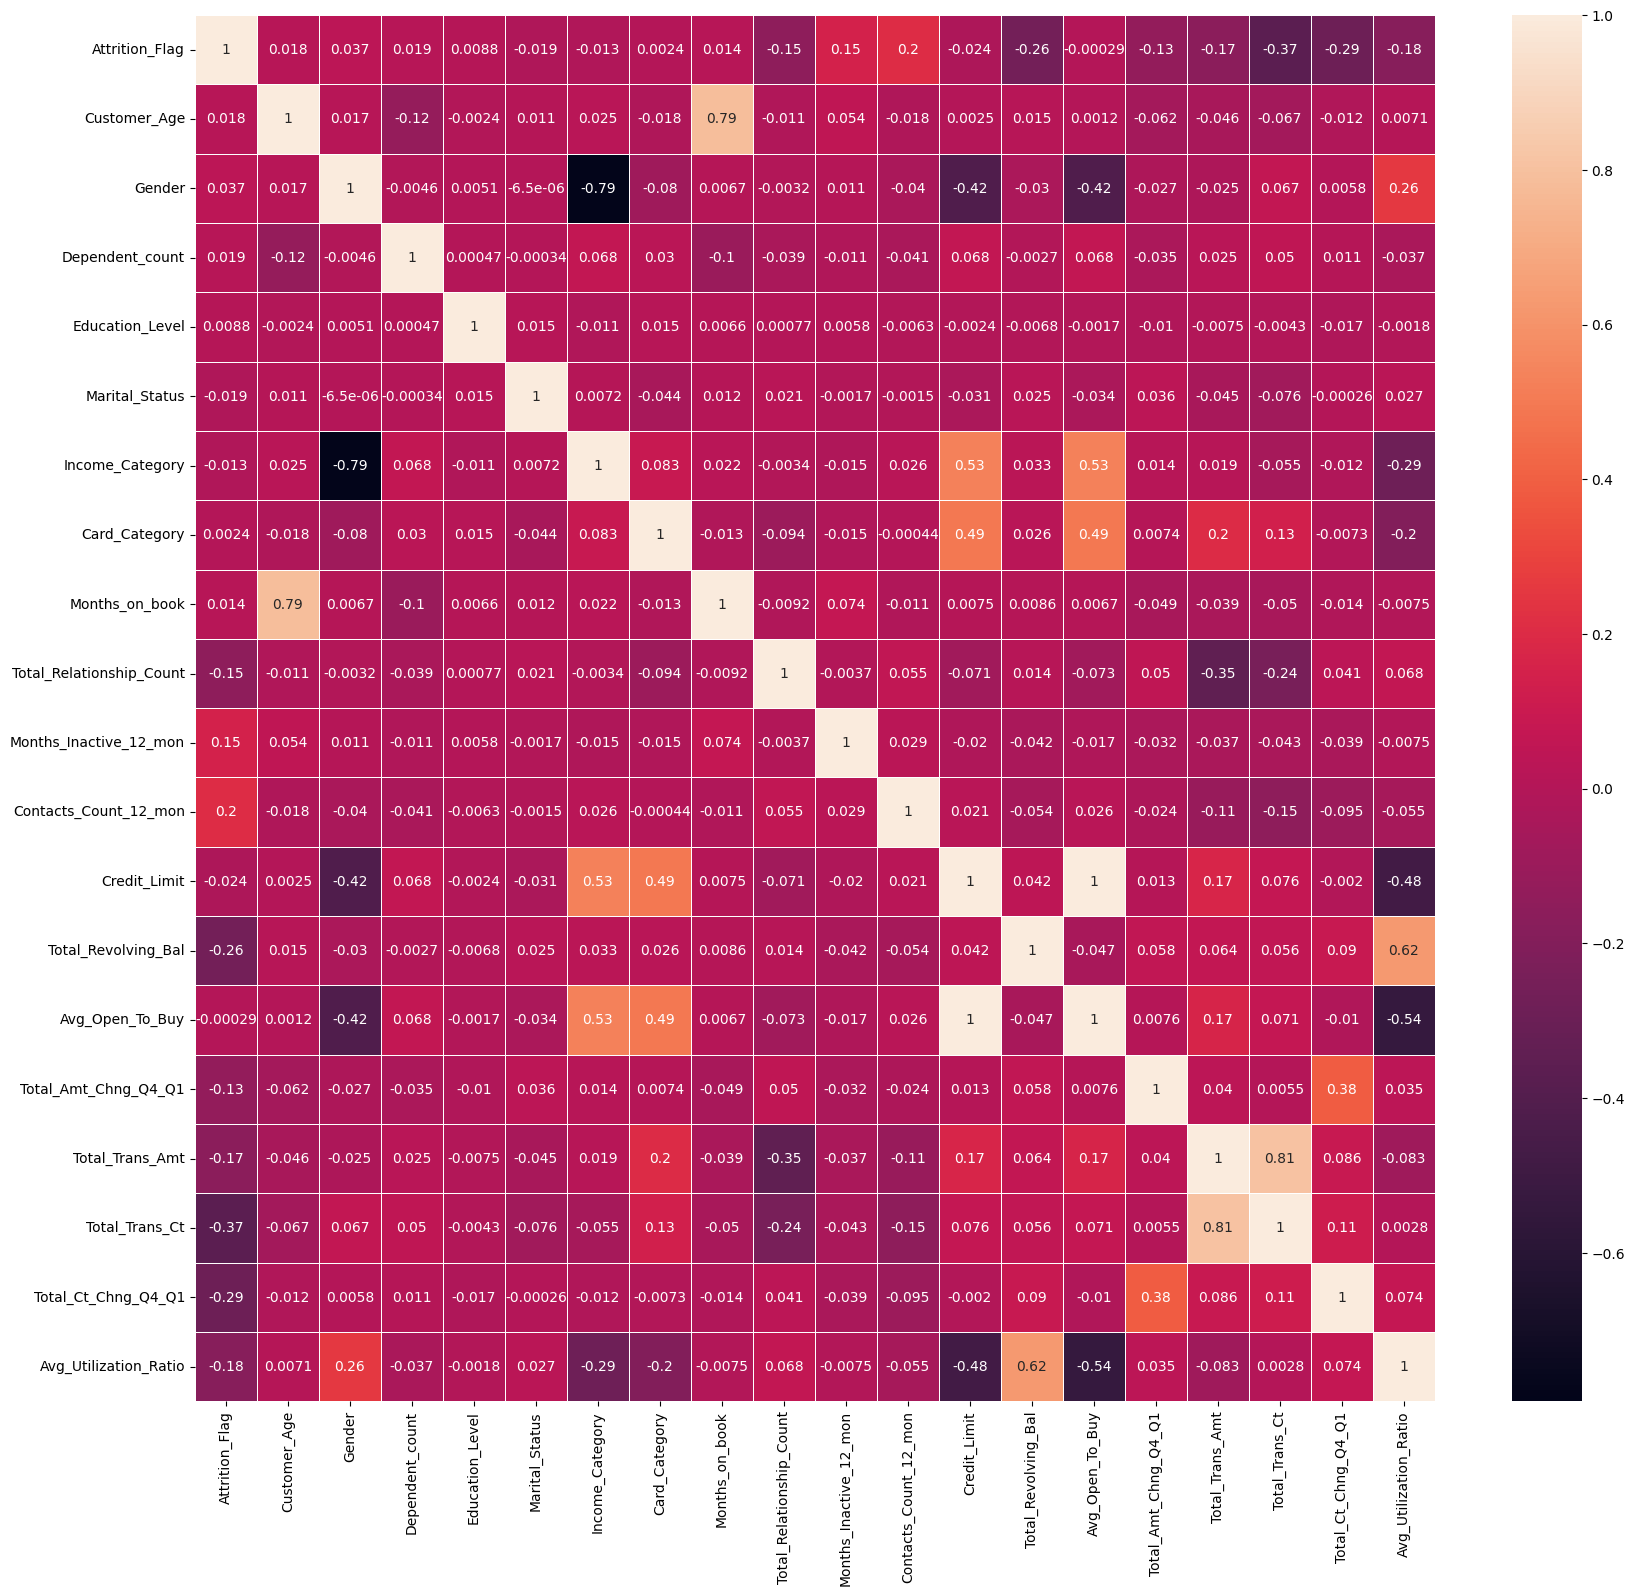

In [ ]:
# creating a correlation matrix
correlation_matrix = analysisData.corr()
# heatmap to show correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)
plt.show()

Highest correlations (answer to question 6):


1.   Total_Trans_Amt and Total_Trans_Ct 0.81
2.   Customer_Age and Months_on_book 0.79
3.   Total_Revolving_Bal and Avg_Utilization_Ratio 0.62
4.   Income_Category and Avg_Open_To_Buy 0.53
5.   Income-Category and Credit_Limit 0.53
6.   Card_Category and Avg_Open_To_Buy 0.49
7.   Card_Category and Credit_Limit 0.49
8.   Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 0.38
9.   Gender and Avg_Utilization_Ratio 0.26

Observations: The top two correlations with the target variable, Attrition_Flag, is Contacts_Count_12_mon and Months_Inactive_12_mon. Most of the correlations are obviously correlated with the exception of gender having a decent correlation with the average ulilization ratio.




Attrition_Flag     0     1    All
Customer_Age                     
All             8500  1627  10127
43               388    85    473
48               387    85    472
44               416    84    500
46               408    82    490
45               407    79    486
49               416    79    495
47               403    76    479
41               303    76    379
50               381    71    452
54               238    69    307
40               297    64    361
42               364    62    426
53               328    59    387
52               318    58    376
51               340    58    398
55               228    51    279
39               285    48    333
38               256    47    303
56               219    43    262
59               117    40    157
37               223    37    260
57               190    33    223
58               133    24    157
36               197    24    221
35               163    21    184
33               107    20    127
34            

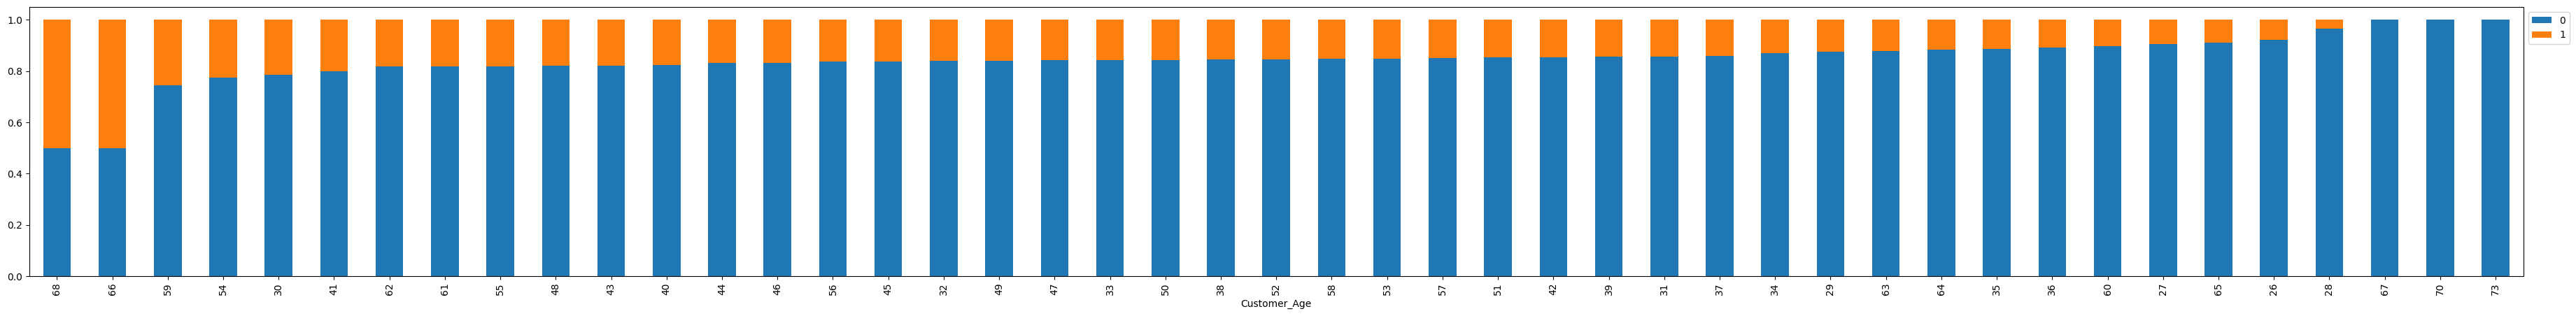

In [ ]:
# stacked barplot for customer age
stacked_barplot(analysisData, 'Customer_Age', 'Attrition_Flag')

Observations: There are a couple of customers that are outliers in the normal age range but they are existing customers and should not affect the model in predicting attrited customers.

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


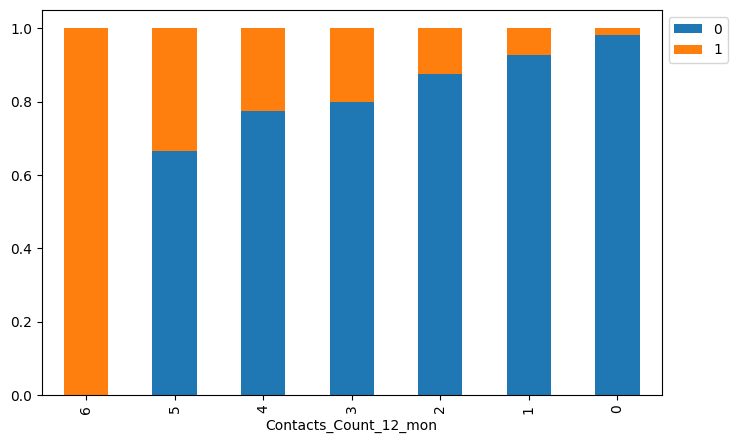

In [ ]:
# stacked barplot for contact count in 12 months
stacked_barplot(analysisData, 'Contacts_Count_12_mon', 'Attrition_Flag')

Observations: Every customer that has contacted more than 6 times in the past 12 months are all attrited customers.

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


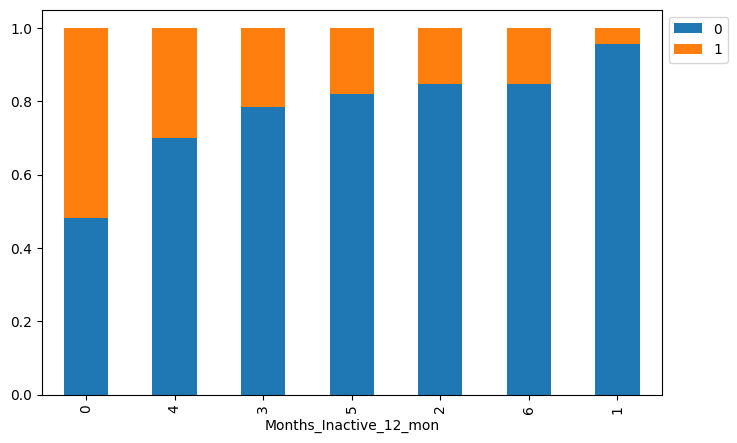

In [ ]:
# stacked barplot for months inactive
stacked_barplot(analysisData, 'Months_Inactive_12_mon', 'Attrition_Flag')

Observations: Suprisingly, it seems customers that are very active (0 months inactive) have the largest distribution of attrited customers.

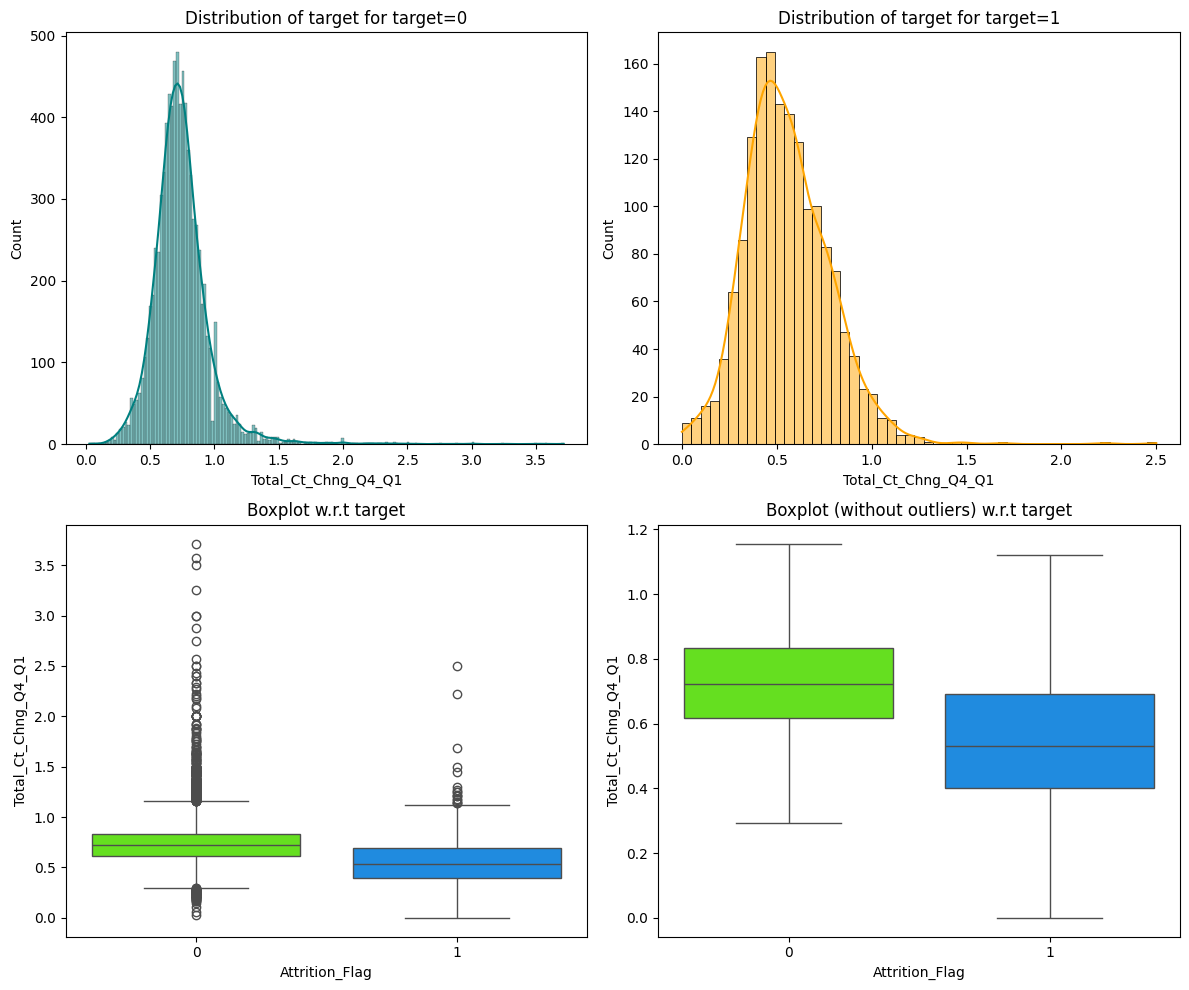

In [ ]:
# distribution plot for total change from quarter 4 to quarter 1
distribution_plot_wrt_target(analysisData, 'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag')

Observations: The mean count changes are lower in attritied rather than existing customers and there are more outliers belonging to existing customers but that is due to sample size of each class.

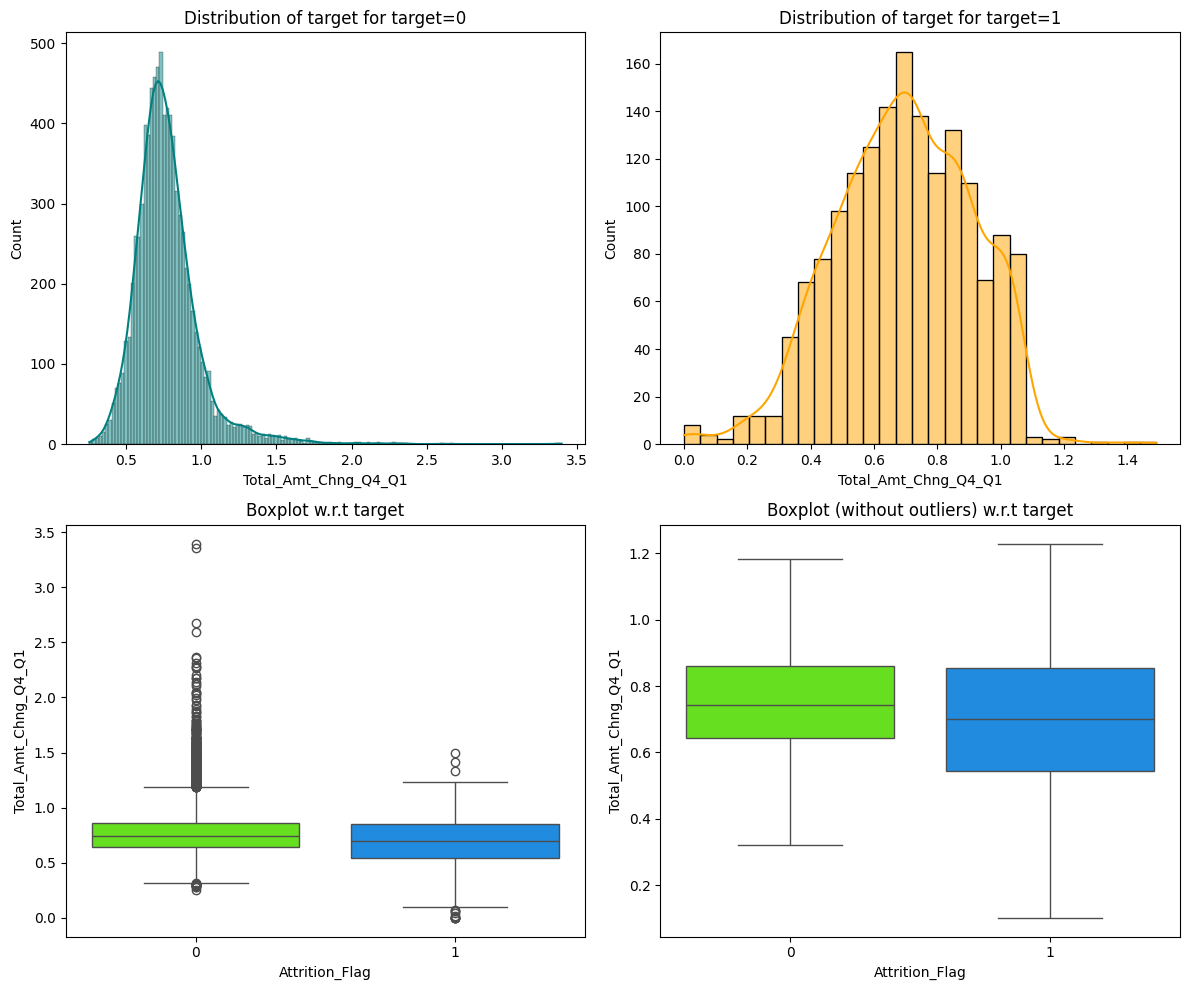

In [ ]:
# distribution plot for total amount change in quarter 4 to quarter 1
distribution_plot_wrt_target(analysisData, 'Total_Amt_Chng_Q4_Q1', 'Attrition_Flag')

Observations: Same observations from Total_Ct_Chng_Q4_Q1.


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that we can identify evey customer at-risk for not using their credit card.
* We would want Recall to be maximized as greater the Recall, the higher the chances of finding at-risk customers.
* We want to minimize false negatives because we do not want to lose anymore credit card users.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(name, testing_set, model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    if(testing_set == 'y_train'):
      Tset = "Training"
    elif(testing_set == 'y_train_over'):
      Tset = "Oversampled Training"
    elif(testing_set == 'y_train_un'):
      Tset = "Undersampled Training"
    elif(testing_set == 'y_val'):
      Tset = "Validation"
    elif(testing_set == 'y_val_over'):
      Tset = "Oversampled Validation"
    elif(testing_set == 'y_val_un'):
      Tset = "Undersampled Validation"
    else:
      Tset = "Testing"

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Name": name,
            "Testing_set": Tset,
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def conf_matrix(model, predictors, target):

  # predicting using the independent variables
  pred = model.predict(predictors)

  # creating the confusion matrix
  cm = confusion_matrix(target, pred)

  # finding the percentage of each element in the 2 rows
  cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100

  # creating labels to format and display the counts and percentages on the confusion matrix
  annot_labels = [[f"{count}\n({percent:.2f}%)" for count, percent in zip(row, row_percent)]
                for row, row_percent in zip(cm, cm_percent)]


  # plotting the confusion matrix
  sns.heatmap(cm, annot=annot_labels, fmt="", cmap="Blues", cbar=False)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models
scores = []  # empty list to store new scores

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Logistic Regression", LogisticRegression(random_state=1, max_iter = 1000)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("AdaBoosting", AdaBoostClassifier(random_state=1)))

# seperating the target variable
X = analysisData.drop(['Attrition_Flag'], axis=1)
y = analysisData['Attrition_Flag']

# splitting the training set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)

# splitting the validation and testing set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# fitting models to training set and adding them to scores dataframe
for name, model in models:
    model.fit(X_train, y_train)
    scores.append(model_performance_classification_sklearn(name, "y_train", model, X_train, y_train))

# fitting models to validation set and adding them to scores
for name, model in models:
    model.fit(X_train, y_train)
    scores.append(model_performance_classification_sklearn(name, "y_val", model, X_val, y_val))

# concatenating the scores and printing
all_scores = pd.concat(scores, ignore_index=True)
all_scores

,Name,Testing_set,Accuracy,Recall,Precision,F1
0,Bagging,Training,0.997038,0.981595,1.000000,0.990712
1,Random forest,Training,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,Training,0.889895,0.498978,0.731634,0.593313
3,Decision Tree,Training,1.000000,1.000000,1.000000,1.000000
4,XGBoost,Training,1.000000,1.000000,1.000000,1.000000
5,AdaBoosting,Training,0.967577,0.875256,0.919441,0.896805
6,Bagging,Validation,0.948148,0.768997,0.897163,0.828151
7,Random forest,Validation,0.951605,0.775076,0.913978,0.838816
8,Logistic Regression,Validation,0.888395,0.489362,0.735160,0.587591
9,Decision Tree,Validation,0.934815,0.759878,0.825083,0.791139


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# fitting the models on oversampled data and adding them to the scores dataframe
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores.append(model_performance_classification_sklearn(name, "y_train_over", model, X_train_over, y_train_over))

# fitting the models on the validation set and adding them to the scores dataframe
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores.append(model_performance_classification_sklearn(name, "y_val_over", model, X_val, y_val))

# concatenating the scores and printing
all_scores = pd.concat(scores, ignore_index=True)
all_scores

,Name,Testing_set,Accuracy,Recall,Precision,F1
0,Bagging,Training,0.997038,0.981595,1.000000,0.990712
1,Random forest,Training,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,Training,0.889895,0.498978,0.731634,0.593313
3,Decision Tree,Training,1.000000,1.000000,1.000000,1.000000
4,XGBoost,Training,1.000000,1.000000,1.000000,1.000000
5,AdaBoosting,Training,0.967577,0.875256,0.919441,0.896805
6,Bagging,Validation,0.948148,0.768997,0.897163,0.828151
7,Random forest,Validation,0.951605,0.775076,0.913978,0.838816
8,Logistic Regression,Validation,0.888395,0.489362,0.735160,0.587591
9,Decision Tree,Validation,0.934815,0.759878,0.825083,0.791139


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# fitting the models on undersampled data and adding them to the scores dataframe
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores.append(model_performance_classification_sklearn(name, "y_train_un", model, X_train_un, y_train_un))

# fitting the models on the validation set and adding them to the scores dataframe
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores.append(model_performance_classification_sklearn(name, "y_val_un", model, X_val, y_val))

# concatenating the scores and printing
all_scores = pd.concat(scores, ignore_index=True)
all_scores

,Name,Testing_set,Accuracy,Recall,Precision,F1
0,Bagging,Training,0.997038,0.981595,1.000000,0.990712
1,Random forest,Training,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,Training,0.889895,0.498978,0.731634,0.593313
3,Decision Tree,Training,1.000000,1.000000,1.000000,1.000000
4,XGBoost,Training,1.000000,1.000000,1.000000,1.000000
5,AdaBoosting,Training,0.967577,0.875256,0.919441,0.896805
6,Bagging,Validation,0.948148,0.768997,0.897163,0.828151
7,Random forest,Validation,0.951605,0.775076,0.913978,0.838816
8,Logistic Regression,Validation,0.888395,0.489362,0.735160,0.587591
9,Decision Tree,Validation,0.934815,0.759878,0.825083,0.791139


Observations: Observations: Overall RandomForest, AdaBoosting, and XGBoosting performed generally the best over all samples of Data. However the highest recall across all of the different models was XGBoost with undersampled data.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [ ]:
# defining model
model = XGBClassifier(random_state=1)

# using the recommended XGBoost parameters
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# defining the scorer
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=XGBClassifier,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1
)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9805494505494504:


## Model Comparison and Final Model Selection

In [ ]:
# using the best XGBoost parameters from RandomizedSearchCV
best_model = XGBClassifier(
            n_estimators =  75,
            scale_pos_weight = 5,
            learning_rate = 0.05,
            gamma = 3,
            subsample = 0.7)

# fitting the model
best_model.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_performance_classification_sklearn("XGBoostClassifier", "y_train_un", best_model, X_test, y_test)

,Name,Testing_set,Accuracy,Recall,Precision,F1
0,XGBoostClassifier,Undersampled Training,0.890424,0.98125,0.592453,0.738824


Observations: Overall recall score of 98.13%.

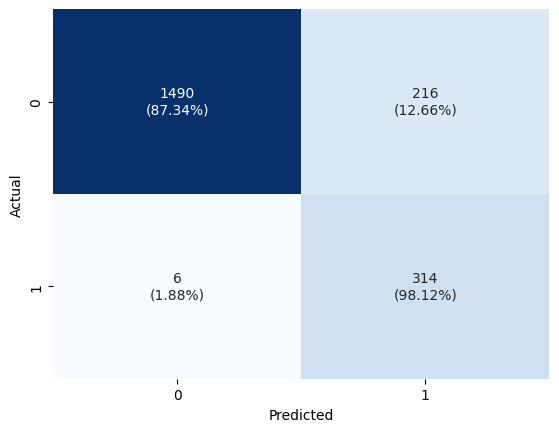

In [ ]:
# printing confusion matrix
conf_matrix(best_model, X_test, y_test)

In [ ]:
# finding the most important features in the classifier
feature_importances = best_model.feature_importances_

# printing results
print("Feature importances:")
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(feature_name, ":", "{:.2f}".format(importance))

Feature importances:
Customer_Age : 0.04
Gender : 0.03
Dependent_count : 0.02
Education_Level : 0.02
Marital_Status : 0.04
Income_Category : 0.03
Card_Category : 0.02
Months_on_book : 0.02
Total_Relationship_Count : 0.06
Months_Inactive_12_mon : 0.04
Contacts_Count_12_mon : 0.03
Credit_Limit : 0.03
Total_Revolving_Bal : 0.08
Avg_Open_To_Buy : 0.04
Total_Amt_Chng_Q4_Q1 : 0.05
Total_Trans_Amt : 0.10
Total_Trans_Ct : 0.26
Total_Ct_Chng_Q4_Q1 : 0.06
Avg_Utilization_Ratio : 0.04


# Business Insights and Conclusions

*** As obviously shown, the two most important factors that the bank needs to monitor is the the total transaction counts and total transaction amounts. These variables show warning signs of customers not seeing interest in using their credit cards anymore. Other minimal factors to consider is their total revolving balance each month and total relationship count. If customers are having a large bill rack up each month they are going to stop spending and saving to pay the bills. Also, if the customer has many products or services from the bank this can give us stronger data and inferences on how the customer views the bank and their relastionship.